In [2]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(DEVICE, '\ttorch : ', torch.__version__)

cuda 	torch :  1.12.0


In [4]:
BATCH_SIZE = 128 
EPOCHS = 100

In [5]:
train_dataset = datasets.MNIST(root = '../../data/MNIST',
                               train=True,
                               download=True,
                               transform= transforms.ToTensor())
train_loader= torch.utils.data.DataLoader(train_dataset,
                                          shuffle = True,
                                          batch_size = BATCH_SIZE)

test_dataset = datasets.MNIST(root = '../../data/MNIST',
                               train=False,
                               download=True,
                               transform= transforms.ToTensor())
test_loader= torch.utils.data.DataLoader(train_dataset,
                                          shuffle = False,
                                          batch_size = BATCH_SIZE)

In [6]:
for (X_train, y_train) in train_loader :
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break

torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.FloatTensor torch.LongTensor


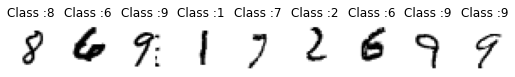

In [7]:
pltsize = 1 
plt.figure(figsize=(pltsize * 10, pltsize))

for i in range(1, 10) :
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap= 'gray_r')
    plt.title('Class :' + str(y_train[i].item()))
plt.show()

In [9]:
class Net(nn.Module) :
    def __init__(self) :
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.dropout_prob = 0.5

    def forward(self, x) :
        x = x.reshape(-1, 28*28)
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [10]:
import torch.nn.init as init 
def weight_init(m) :
    # m이 리니어모델인지 확인
    if isinstance(m, nn.Linear) :
        init.kaiming_uniform(m.weight.data)

In [12]:
model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_23900\4249598189.py:4: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
